In [17]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, balanced_accuracy_score, roc_auc_score, accuracy_score)

In [18]:
# loading the datasets
from sklearn.datasets import load_digits

digits = load_digits()


In [24]:
# selecting features and target
X = digits.data
Y = digits.target

# splitting training and testing data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=72, shuffle=True)

# standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# defining the model
model_dr = DecisionTreeClassifier()

# fit the model
model_dr.fit(X_train, Y_train)


DecisionTreeClassifier()

In [29]:
# predictions
pred_dr = model_dr.predict(X_test)
y_prob_dr = model_dr.predict_proba(X_test)

# evaluations
bal_acc_dr = balanced_accuracy_score(Y_test, pred_dr)
roc_dr = roc_auc_score(Y_test, y_prob_dr, multi_class="ovr", average="macro")

print(f"Decision Tree Balanced Accuracy: {bal_acc_dr:.4f}")
print(f"Decision Tree ROC-AUC Score: {roc_dr:.4f}")

Decision Tree Balanced Accuracy: 0.8980
Decision Tree ROC-AUC Score: 0.9435


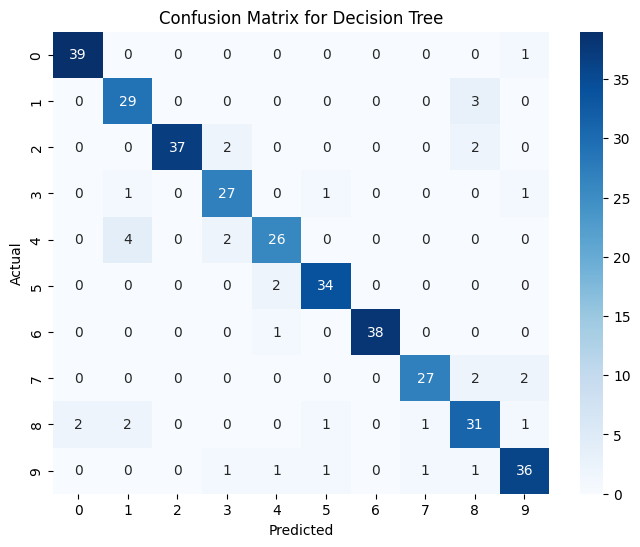

In [31]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, pred_dr), annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [32]:
#hyperparameter tuning using gridsearchcv

from sklearn.model_selection import GridSearchCV


param_grid_dr = {
    'max_depth': [None, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4],       
    'criterion': ['gini', 'entropy'],    
    'max_features': [None, 'sqrt', 'log2']  
}

# perform GridSearchCV
grid_search_dr = GridSearchCV(DecisionTreeClassifier(random_state=72), param_grid_dr, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_dr.fit(X_train, Y_train)

# Best Parameters
best_dt = grid_search_dr.best_estimator_
print(f"\nBest Decision Tree Parameters: {grid_search_dr.best_params_}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


Optimized Decision Tree Balanced Accuracy: 0.8693
Optimized Decision Tree ROC-AUC Score: 0.9296


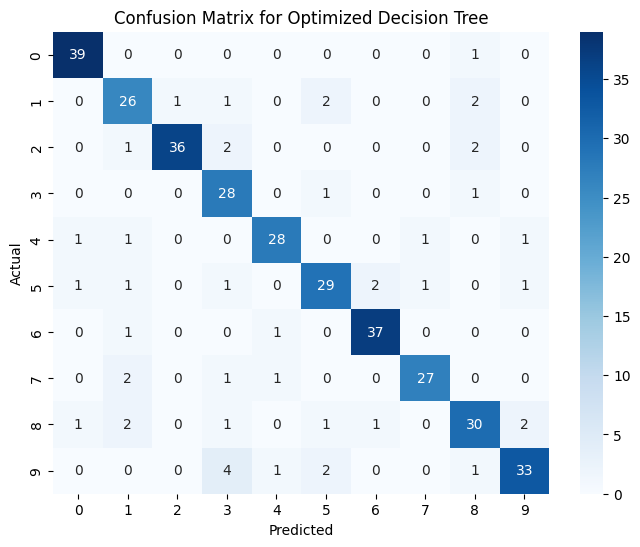

In [33]:
# Train optimized Decision Tree model with best parameters
optimal_model_dr = DecisionTreeClassifier(**grid_search_dr.best_params_, random_state=72)
optimal_model_dr.fit(X_train, Y_train)

# Predictions and performance evaluation
optimal_pred_dr = optimal_model_dr.predict(X_test)
optimal_prob_dr = optimal_model_dr.predict_proba(X_test)


print(f"Optimized Decision Tree Balanced Accuracy: {balanced_accuracy_score(Y_test, optimal_pred_dr):.4f}")
print(f"Optimized Decision Tree ROC-AUC Score: {roc_auc_score(Y_test, optimal_prob_dr, multi_class='ovr', average='macro'):.4f}")

# Confusion Matrix for the optimized model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, optimal_pred_dr), annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Optimized Decision Tree")
plt.show()
